-----------

## K-NN(K-Nearest Neighbor) 


### K-NN 알고리즘의 원리

- K-NN 알고리즘에서는 새로운 데이터의 클래스를 해당 데이터와 가장 가까운 k개 데이터들의 클래스(범주)로 결정한다. 

- 예를 들어 아래의 그림에서 '?'의 클래스를 구분하고자 할 때, k를 1로 설정할 경우는 사각형으로 분류할 수 있고 k를 3으로 설정할 경우는 삼각형으로 분류될 수 있다. 

<img src='https://github.com/mjaemin/ADP/blob/main/class101/KNN.png?raw=true' width="600">
- K-NN 알고리즘에서는 최근접 이웃 간의 거리를 계산할 때 유클리디안 거리, 맨하탄 거리, 민코우스키 거리 등을 사용할 수 있으며, 대표적으로 유클리디안 거리를 사용한다. 

###  K의 선택 
- K의 선택은 학습의 난이도와 데이터의 개수에 따라 결정될 수 있으며, 일반적으로는 훈련 데이터 개수의 제곱근으로 설정한다. 그리고 짝수로 했을 때, 인접객체의 범주가 동률일 경우가 나오므로 일반적으로 홀수로 설정함 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

credit = pd.read_csv("../data/credit_final.csv")
X = credit[credit.columns.difference(['credit.rating'])]
y = credit['credit.rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y , random_state=321)
X_train.head()

,account.balance,age,apartment.type,bank.credits,credit.amount,credit.duration.months,credit.purpose,current.assets,dependents,employment.duration,foreign.worker,guarantor,installment.rate,marital.status,occupation,other.credits,previous.credit.payment.status,residence.duration,savings,telephone
75,2,24,2,1,2030,9,2,3,1,3,1,1,2,3,3,2,2,1,4,2
112,2,36,2,1,2366,12,4,3,1,3,1,1,3,1,4,2,3,3,3,2
327,3,46,2,2,1343,6,4,1,2,4,2,1,1,3,3,2,3,4,1,1
894,2,34,2,1,2064,24,2,2,1,1,1,1,3,1,4,2,3,2,1,2
437,3,24,2,1,935,6,3,1,1,2,1,1,3,1,3,2,3,2,1,1


##### 앞서 분할한 credit 데이터의 train데이터로 K-NN 모델을 만들어 보자 

In [2]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [3]:
clf =KNeighborsClassifier() #### k = 5 
clf.fit(X_train,y_train)

KNeighborsClassifier()

In [4]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [5]:
y_pred=clf.predict(X_test)

In [6]:
from sklearn.metrics import confusion_matrix, plot_roc_curve, roc_auc_score
confusion_matrix(y_test,y_pred)

array([[ 22,  68],
       [ 40, 170]], dtype=int64)

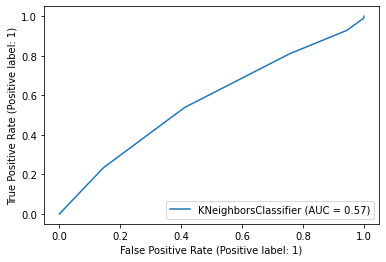

In [7]:
plot_roc_curve(clf, X_test,y_test)

In [8]:
roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])

0.5692592592592592

### 최적의 k찾기

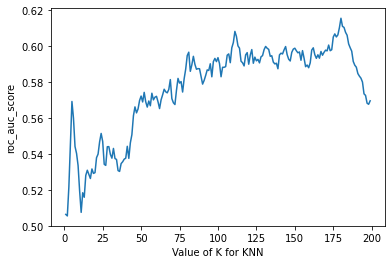

In [12]:
k_range = range(1,200)
k_scores= []

for k in k_range:
    knn=KNeighborsClassifier(k)
    knn.fit(X_train,y_train)
    scores=roc_auc_score(y_test,knn.predict_proba(X_test)[:,1])
    k_scores.append(scores.mean())
    
import matplotlib.pyplot as plt
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('roc_auc_score')
plt.show()

In [15]:
print(max(k_scores))
print(k_scores.index(max(k_scores)))

0.6156349206349208
179


### Cross-validation을 활용한 최적의 k찾기

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
k_range = range(1,100)
k_scores= []

for k in k_range:
    knn=KNeighborsClassifier(k)
    scores=cross_val_score(knn,X,y,cv=10,scoring="accuracy")
    k_scores.append(scores.mean())

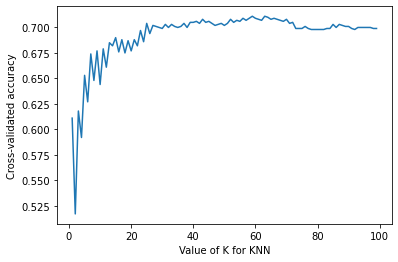

In [20]:
import matplotlib.pyplot as plt
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.show()